In [2]:
import tensorflow as tf
from tensorflow import keras
import warnings

In [3]:
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.10.1


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [5]:
class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

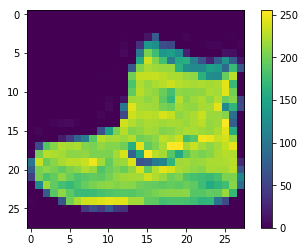

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [14]:
train_images = train_images /255.0
test_images = test_images / 255.0

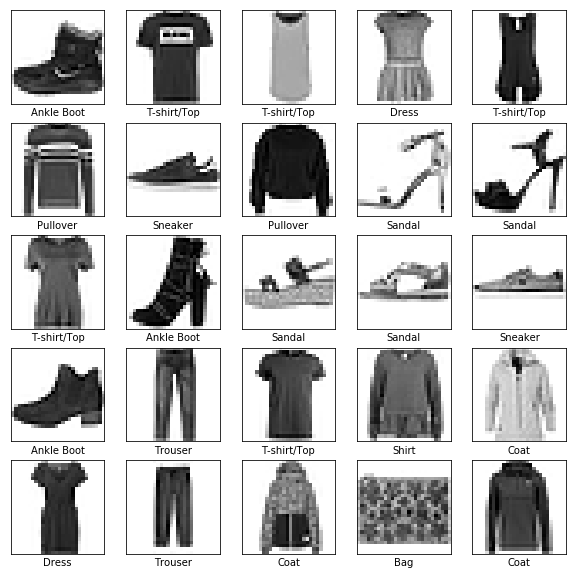

In [15]:
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [17]:
model.compile(optimizer = tf.train.AdamOptimizer(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [21]:
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 6s 97us/step - loss: 0.4977 - acc: 0.8252
Epoch 2/5
60000/60000 [==============================] - 5s 77us/step - loss: 0.3741 - acc: 0.8640
Epoch 3/5
60000/60000 [==============================] - 5s 81us/step - loss: 0.3351 - acc: 0.8783
Epoch 4/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.3111 - acc: 0.8856
Epoch 5/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.2947 - acc: 0.8910


In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy: ', test_acc)

10000/10000 [==============================] - 1s 51us/step
('Test accuracy: ', 0.8749)


In [23]:
predictions = model.predict(test_images)

In [24]:
predictions[0]

array([5.3363856e-06, 1.6259621e-06, 5.3486492e-06, 5.8140213e-08,
       4.7584895e-06, 3.6746558e-02, 6.8084773e-06, 1.7382093e-02,
       1.0992047e-04, 9.4573748e-01], dtype=float32)

In [25]:
np.argmax(predictions[0])

9

In [26]:
test_labels[0]

9

In [31]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_labels, img = predictions_array[1],true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap = plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100 * np.max(predictions_array),
                                        class_names[true_label]),
                                        color = color)

def plot_value_array(i, prediction_array, true_label):
    prediction_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = '#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(prediction_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

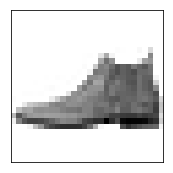

In [32]:
i = 0
plt.figure(figsize = (6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)